In [4]:
from sklearn.utils.fixes import sklearn
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
# decision surface for logistic regression on a binary classification dataset
from sklearn.model_selection import KFold
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.io as sio
from numpy.linalg import inv

In [5]:
#aplicando histogramas para os atributos contínuos:
def multigraficos_histograma(data, nrows, ncols, nomes):
    fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15, 5*nrows))
    k = 0
    for i in range(nrows):
        for j in range(ncols):
            sns.histplot(ax = axs[i,j], data = data, x = nomes[k])
            axs[i, j].set_xlabel(nomes[k])
            axs[i, j].set_ylabel("contagem")
            k+=1
        #
    #
#

nrows = 2
ncols = 4

In [6]:
import requests
import json

requisicao = requests.get('https://economia.awesomeapi.com.br/all/USD-BRL')

cotacao = requisicao.json()

cotacao

print('#### Cotação do Dolar ####')

print('Moeda: ' + cotacao['USD']['name'])

print('Data: ' + cotacao['USD']['create_date'])

print('Valor atual: R$' + cotacao['USD']['bid'])
reais = float(cotacao['USD']['bid'])


#### Cotação do Dolar ####
Moeda: Dólar Americano/Real Brasileiro
Data: 2023-12-08 18:29:44
Valor atual: R$4.9317


In [7]:
# Lendo a base de dados
df = pd.read_csv("/content/drive/Shareddrives/Ufla/Pattern_Recognition/cards.csv")
df_copy = df
df.head()

<ipython-input-7-fd3eba1796bb>:2: DtypeWarning: Columns (3,7,12,16,20,23,25,26,30,31,32,33,35,39,40,41,47,52,53,61,62,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/Shareddrives/Ufla/Pattern_Recognition/cards.csv")


,artist,artistIds,asciiName,attractionLights,availability,boosterTypes,borderColor,cardParts,colorIdentity,colorIndicator,...,subsets,subtypes,supertypes,text,toughness,type,types,uuid,variations,watermark
0,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN
1,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,NaN
2,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN
3,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,NaN
4,Mark Zug,48e2b98c-5467-4671-bd42-4c3746115117,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,NaN,NaN,Target creature gets +3/+3 and gains flying un...,NaN,Sorcery,Sorcery,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,c5655330-5131-5f40-9d3e-0549d88c6e9e,NaN


In [8]:
df_price = pd.read_csv('/content/drive/Shareddrives/Ufla/Pattern_Recognition/price.csv')
df_price.head()
no_price = df_price.columns.values
price = ['price']
df_price.drop(columns=[col for col in df_price if col not in price], inplace=True)
df_price

,price
0,0.08
1,0.27
2,0.02
3,0.17
4,0.02
...,...
47367,0.02
47368,0.05
47369,0.17
47370,0.98


# Sobre a Base de Dados.

A Base de dados é um conjunto de informações de cartas do popular jogo de cartas: Magic: the Gathering. Base de dados retirada do site: https://mtgjson.com/ onde podemos encontrar dados de diversas variedades e para varios modelos.
Foram retiradas 2 bases de dados:  Uma contendo informações sobre uma gama numerosa de cartas e uma sobre seus respectivos preços. O objetivo é tentarmos analisar o inpacto de determinados atributos relacionados as cartas e tentarmos notar um padrão comportamental sobre o preço delas respectivamente. No mais tardar como possivel linha de trabalho poder validar o impacto das habilidades atravês de redes transformers, NLP e tokenização dos textos, para o efeito do preço da carta: Ex: "Descarte compre 3" e o valor da carta sendo 1000 reais.

In [9]:
df_price.shape

(47372, 1)

In [10]:
df.shape

(87218, 78)

É importante salientar que nesse objeto de estudo será de importantissimo a seleção de atributos para reduzirmos as analises a um escopo mais tranquilo neste primeiro momento tanto quanto visto que, a base de dados de cards.csv possui 78 colunas e nem todas são de nosso interesse.
A base de dados de preço contém a precificação de 47372 cartas diferentes e a de cartas contém 87218 cartas dentre as quais muitas são duplicadas visto a natureza do tratamento final, edição, se é carta promocional e afins....


Sobre os atributos que iremos usar:


1.   price ( preço da carta em reais após conversão)
2.   name  ( Nome da carta )
3.   edhrecRanking ( Posição da carta no ranking do site EDHREC que valida cartas para o formato Commander ( representa o quanto a carta aparece em listas ou é preferida por jogadores pra ser usada. Ex: Cartas com ranking alto significa menor taxa de uso ))
4.   edhrecSaltiness ( atributo númerico que mostra quanto uma carta agrega a baralhos de sua cor ( será usado para validar o power level dela, quantizando quão boa ela é e qual seu grau de contribuição para o preço insidente sobre a carta ))
5.   power & toughness ( poder e resistência das cartas e influiram no preço da carta também pois atuam em uma mecânica básica do jogo )
6.   manaValue e manaCost ( valor de mana total para a carta ser jogada e custo de mana levando em consideração valor de mana colorido específico de cada carta para ser jogada. ( será usado o valor de mana total para indicar que cartas com custo menor e efeito forte tem efeito sobre o preço bem maior do que cartas muito caras porém com efeito muito muito pouco impactante ))
7.   rarity ( é o atributo que indica qual o nível de raridade da carta, podendo ele ser: (comum, incomum, rara ou mítica) e será + um atributo a incidir sobre o preço visto que quanto menor a raridade maior a disponibilidade no mercado e maior a tiragem dessa carta )   


# ***Pré-Processamento***

# Tratamentos na Base de dados e normalizações

A base de dados possui dados faltantes porém entendiveis e são importantes para a análise. ( Exemplo: carta de mágica não terá poder ou resitência portanto esse campo em todas as cartas desse tipo são NAN, tal analógia também é válida para terrenos )


In [11]:
df.isna().sum()

artist                 13
artistIds              13
asciiName           87003
attractionLights    87083
availability            0
                    ...  
type                    0
types                   0
uuid                    0
variations          62063
watermark           81308
Length: 78, dtype: int64

In [12]:
desared_atributs = ['manaValue', 'manaCost', 'isPromo', 'edhrecRank', 'edhrecSaltiness', 'rarity', 'name', 'power', 'toughness', 'text', 'finishes', 'isReserved', 'keywords', 'originalText',  'originalType','price']
df.drop(columns=[col for col in df if col not in desared_atributs], inplace=True)

In [13]:
df.head()

,edhrecRank,edhrecSaltiness,finishes,isPromo,isReserved,keywords,manaCost,manaValue,name,originalText,originalType,power,rarity,text,toughness
0,20472.0,0.14,nonfoil,NaN,NaN,First strike,{5}{W}{W},7.0,Ancestor's Chosen,First strike\nWhen Ancestor's Chosen comes int...,Creature - Human Cleric,4,uncommon,First strike (This creature deals combat damag...,4
1,20472.0,0.14,foil,NaN,NaN,First strike,{5}{W}{W},7.0,Ancestor's Chosen,NaN,NaN,4,uncommon,First strike (This creature deals combat damag...,4
2,16397.0,0.36,nonfoil,NaN,NaN,Flying,{4}{W},5.0,Angel of Mercy,"Flying\nWhen Angel of Mercy comes into play, y...",Creature - Angel,3,uncommon,Flying\nWhen Angel of Mercy enters the battlef...,3
3,16397.0,0.36,foil,NaN,NaN,Flying,{4}{W},5.0,Angel of Mercy,NaN,NaN,3,uncommon,Flying\nWhen Angel of Mercy enters the battlef...,3
4,21812.0,0.05,nonfoil,NaN,NaN,NaN,{2}{W},3.0,Angelic Blessing,Target creature gets +3/+3 and gains flying un...,Sorcery,NaN,common,Target creature gets +3/+3 and gains flying un...,NaN


In [14]:
price_column = df_price["price"]
df = pd.concat([df,price_column], axis = 1)

In [15]:
df.columns.values

array(['edhrecRank', 'edhrecSaltiness', 'finishes', 'isPromo',
       'isReserved', 'keywords', 'manaCost', 'manaValue', 'name',
       'originalText', 'originalType', 'power', 'rarity', 'text',
       'toughness', 'price'], dtype=object)

In [16]:
to_drop = ['finishes','isPromo','isReserved', 'originalType','manaCost', 'originalText', 'keywords', 'text']
df_temp = df.drop(columns=[col for col in df if col in to_drop])
var_columns = df_temp.columns.values
var_columns.tolist()

['edhrecRank',
 'edhrecSaltiness',
 'manaValue',
 'name',
 'power',
 'rarity',
 'toughness',
 'price']

In [17]:
df_temp.isna().sum()

edhrecRank          7042
edhrecSaltiness    23161
manaValue              0
name                   0
power              45699
rarity                 0
toughness          45699
price              39847
dtype: int64

In [18]:
df_temp.drop_duplicates(subset=['name'], inplace =True)

In [19]:
df_temp.dropna(subset=['price', 'edhrecSaltiness', 'edhrecRank', 'name'])

,edhrecRank,edhrecSaltiness,manaValue,name,power,rarity,toughness,price
0,20472.0,0.14,7.0,Ancestor's Chosen,4,uncommon,4,0.08
2,16397.0,0.36,5.0,Angel of Mercy,3,uncommon,3,0.02
4,21812.0,0.05,3.0,Angelic Blessing,NaN,common,NaN,0.02
6,4889.0,0.06,5.0,Angelic Chorus,NaN,rare,NaN,0.02
7,6098.0,0.14,2.0,Angelic Wall,0,common,4,0.03
...,...,...,...,...,...,...,...,...
47366,3034.0,0.28,5.0,"Kyler, Sigardian Emissary",2,mythic,2,0.06
47367,10229.0,0.29,6.0,Celestial Judgment,NaN,rare,NaN,0.02
47368,11411.0,0.71,5.0,Curse of Conformity,NaN,rare,NaN,0.05
47369,6979.0,0.45,6.0,Moorland Rescuer,4,rare,4,0.17


In [20]:
df_desired = df_temp

In [21]:
df_desired.shape

(28042, 8)

In [22]:
df_temp['edhrecSaltiness'].unique()

array([0.14, 0.36, 0.05, 0.06, 1.15, 0.15,  nan, 0.2 , 0.38, 0.5 , 0.27,
       0.08, 0.11, 0.16, 0.33, 0.59, 0.07, 0.12, 0.39, 0.1 , 0.17, 0.31,
       0.41, 0.56, 0.22, 1.72, 0.09, 0.4 , 0.13, 0.69, 0.24, 0.84, 0.49,
       0.57, 0.26, 0.35, 0.72, 0.25, 1.2 , 0.75, 0.53, 0.67, 0.43, 0.92,
       0.18, 0.6 , 0.03, 0.42, 1.04, 0.9 , 2.11, 1.01, 0.32, 0.21, 0.44,
       1.66, 0.96, 0.29, 0.54, 0.62, 0.81, 0.3 , 0.66, 0.23, 1.23, 0.63,
       1.  , 1.8 , 0.28, 0.19, 1.5 , 0.45, 0.77, 0.65, 0.88, 0.76, 2.69,
       0.58, 1.07, 0.86, 0.79, 1.11, 2.99, 1.56, 1.08, 0.55, 1.37, 1.12,
       0.97, 0.82, 1.71, 1.67, 0.46, 1.78, 1.36, 1.16, 0.93, 1.74, 0.37,
       0.7 , 0.47, 1.54, 1.43, 1.13, 0.73, 0.74, 0.68, 0.71, 1.51, 1.68,
       0.51, 0.34, 1.05, 2.22, 1.7 , 0.89, 1.65, 1.83, 0.99, 0.48, 0.61,
       2.5 , 0.87, 0.04, 0.64, 0.02, 1.18, 2.09, 1.06, 1.25, 1.03, 1.22,
       0.83, 0.85, 1.34, 0.52, 1.39, 1.31, 2.43, 1.94, 1.42, 2.  , 1.19,
       1.82, 0.94, 1.97, 1.62, 2.03, 1.35, 1.99, 0.

Teremos que tratar o caso de NaNs em poder e resistência para podermos entender o espectro de dados que temos.

In [23]:
df_desired['power'].value_counts()

2      4567
3      3104
1      3008
4      1760
5       935
0       711
6       517
7       217
*       182
8        97
10       36
9        35
12       11
11       10
1+*       6
+1        5
+2        3
+3        3
3.5       3
2.5       3
13        3
-1        3
?         2
2+*       2
15        2
18        1
∞         1
1.5       1
.5        1
16        1
*²        1
+4        1
+0        1
Name: power, dtype: int64

In [24]:
to_drop = ['name']
df_temp = df_temp.drop(columns=[col for col in df if col in to_drop])
var_nums = df_temp.columns.values
var_nums.tolist()

['edhrecRank',
 'edhrecSaltiness',
 'manaValue',
 'power',
 'rarity',
 'toughness',
 'price']

In [25]:
df_desired['manaValue'].value_counts

<bound method IndexOpsMixin.value_counts of 0        7.0
2        5.0
4        3.0
6        5.0
7        2.0
        ... 
87055    2.0
87056    2.0
87057    1.0
87058    0.0
87059    0.0
Name: manaValue, Length: 28042, dtype: float64>

In [26]:
to_drop2 = ['*','1+*','2+*','-1','+1','+3','3.5','?','∞','2.5','1.5','99','.5','*²','+4','+0','+2']
for k in range(len(to_drop2)):
  df_desired = df_desired[df_desired.power != to_drop2[k]]

In [27]:
df_desired['power'].value_counts()

2     4567
3     3104
1     3008
4     1760
5      935
0      711
6      517
7      217
8       97
10      36
9       35
12      11
11      10
13       3
15       2
16       1
18       1
Name: power, dtype: int64

In [28]:
df_desired['toughness'].value_counts()

2      3768
3      3296
1      3245
4      2339
5      1101
6       593
0       241
7       218
8        99
10       36
9        34
11       11
12       11
*         7
13        6
3.5       2
15        2
1+*       1
20        1
17        1
14        1
16        1
1.5       1
Name: toughness, dtype: int64

In [29]:
to_drop2 = ['*','1+*','+1','3.5','?','1.5']
for k in range(len(to_drop2)):
  df_desired = df_desired[df_desired.toughness != to_drop2[k]]

In [30]:
df_desired['toughness'].value_counts()

2     3768
3     3296
1     3245
4     2339
5     1101
6      593
0      241
7      218
8       99
10      36
9       34
11      11
12      11
13       6
15       2
16       1
20       1
17       1
14       1
Name: toughness, dtype: int64

In [31]:
df_desired.dropna(subset=['power','toughness','edhrecSaltiness','edhrecRank'],inplace=True)


In [32]:
df_desired['power'].unique()

array(['4', '3', '0', '2', '1', '6', '7', '5', '8', '12', '10', '9', '16',
       '13', '11', '15', '18'], dtype=object)

In [33]:
df_desired['power'] = df_desired['power'].astype(float)
df_desired['toughness'] =df_desired['toughness'].astype(float)

In [34]:
df_name = df_desired['name']
df_name

0            Ancestor's Chosen
2               Angel of Mercy
7                 Angelic Wall
10            Aven Cloudchaser
15             Benalish Knight
                 ...          
87036    Soaring Thought-Thief
87038             Umara Mystic
87052        Sea Gate Colossus
87054        Skyclave Sentinel
87056      Stonework Packbeast
Name: name, Length: 9186, dtype: object

In [35]:
df_desired.drop(columns=['name'],inplace=True)

In [36]:
df_desired.set_index(df_name, inplace=True)

In [37]:
df_desired['price'] = df_desired['price'].apply(lambda x: x*reais)

A base de dados possui outliers nos atributos contínuos [ 'edhrecRank' ,'edhrecSaltiness' , 'manaValue' e 'preço'] , já que os dados muitas vezes se aglomeram em um alcance específico como por exemplo o preço ( terá muitas ocorrências de preços pequenos e de poucos valores de cartas caras. )
Basicamente os dados são assimetricos visto que poucas cartas jogarem muito, teram valores grandes, quantidade de cartas com custos de mana diferentes não são idênticos e nem todas as cartas são populares entre os jogadores.
Existe desbalanceamento entre as classes sim, uma vez quem nem todos os cards teram certos atributos via natureza do jogo.

In [38]:

def class_stats(value):
    if value < 6100:
        return "CartaBoa"
    else:
        return "CartaRuim"

df_desired['class'] = df_desired['edhrecRank'].map(class_stats)
display(df_desired.head())

,edhrecRank,edhrecSaltiness,manaValue,power,rarity,toughness,price,class
name,,,,,,,,
Ancestor's Chosen,20472.0,0.14,7.0,4.0,uncommon,4.0,0.394536,CartaRuim
Angel of Mercy,16397.0,0.36,5.0,3.0,uncommon,3.0,0.098634,CartaRuim
Angelic Wall,6098.0,0.14,2.0,0.0,common,4.0,0.147951,CartaBoa
Aven Cloudchaser,16614.0,0.15,4.0,2.0,common,2.0,6.707112,CartaRuim
Benalish Knight,19196.0,0.15,3.0,2.0,common,2.0,10.701789,CartaRuim


In [39]:
df_desired['class'].unique()

array(['CartaRuim', 'CartaBoa'], dtype=object)

In [40]:
df_desired.dropna(subset=['price'],inplace=True)

In [41]:
df_sal = df_desired['edhrecSaltiness']

In [42]:
df_log = df_desired['edhrecRank'].apply(lambda x: np.log(x))
df_log2 = df_desired['edhrecSaltiness'].apply(lambda x: np.log(x))
df_sqrt = df_desired['edhrecRank'].apply(lambda x: np.sqrt(x))
df_sqrt2 = df_desired['edhrecSaltiness'].apply(lambda x: np.sqrt(x))
df_cbrt = df_desired['edhrecRank'].apply(lambda x: np.cbrt(x))
df_cbrt2 = df_desired['edhrecSaltiness'].apply(lambda x: np.cbrt(x))
df_log1p = df_desired['edhrecRank'].apply(lambda x: np.log1p(x))
df_log21p = df_desired['edhrecRank'].apply(lambda x: np.log1p(x))

<Axes: >

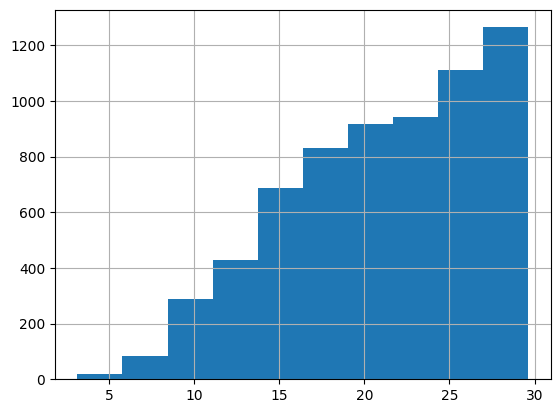

In [43]:
df_cbrt.hist()

<Axes: >

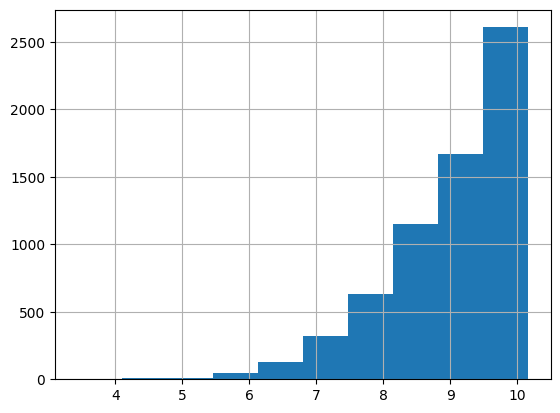

In [44]:
df_log.hist()

<Axes: >

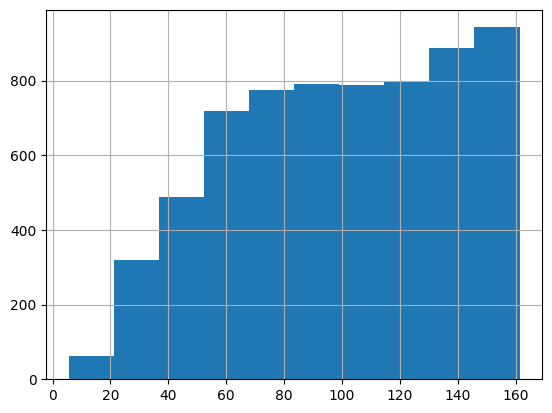

In [45]:
df_sqrt.hist()

<Axes: >

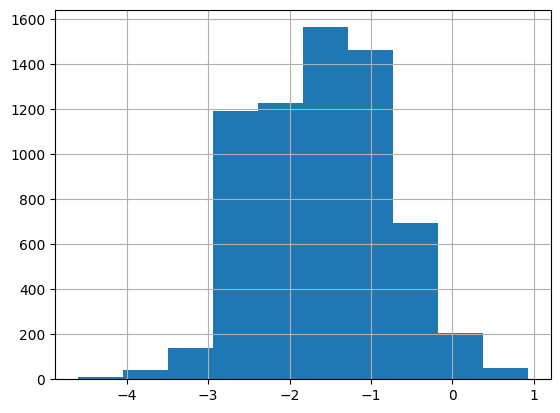

In [46]:
df_log2.hist()

<Axes: >

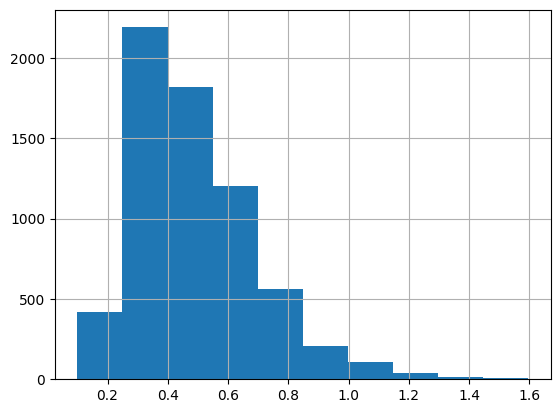

In [47]:
df_sqrt2.hist()

<Axes: >

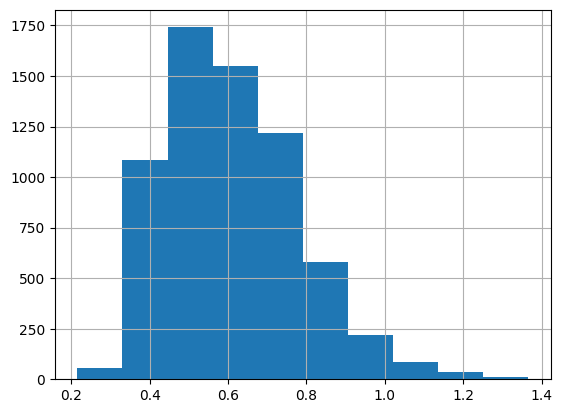

In [48]:
df_cbrt2.hist()

In [49]:
df_desired["rarity"][df_desired["rarity"] == 'uncommon'] = 1
df_desired["rarity"][df_desired["rarity"] == 'common'] = 0
df_desired["rarity"][df_desired["rarity"] == 'rare'] = 2
df_desired["rarity"][df_desired["rarity"] == 'mythic'] = 3
df_desired["rarity"][df_desired["rarity"] == 'special'] = 4
df_desired["rarity"] = df_desired["rarity"].astype(float)


<ipython-input-49-504530516b89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desired["rarity"][df_desired["rarity"] == 'uncommon'] = 1
<ipython-input-49-504530516b89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desired["rarity"][df_desired["rarity"] == 'common'] = 0
<ipython-input-49-504530516b89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desired["rarity"][df_desired["rarity"] == 'rare'] = 2
<ipython-input-49-5

Variaveis com outliers: 
edhrecSaltiness
manaValue
power
rarity
toughness
price

 A observação também poderá ser feita de forma visual, mediante os gráficos de boxplot


Text(0.5, 0, 'rarity')

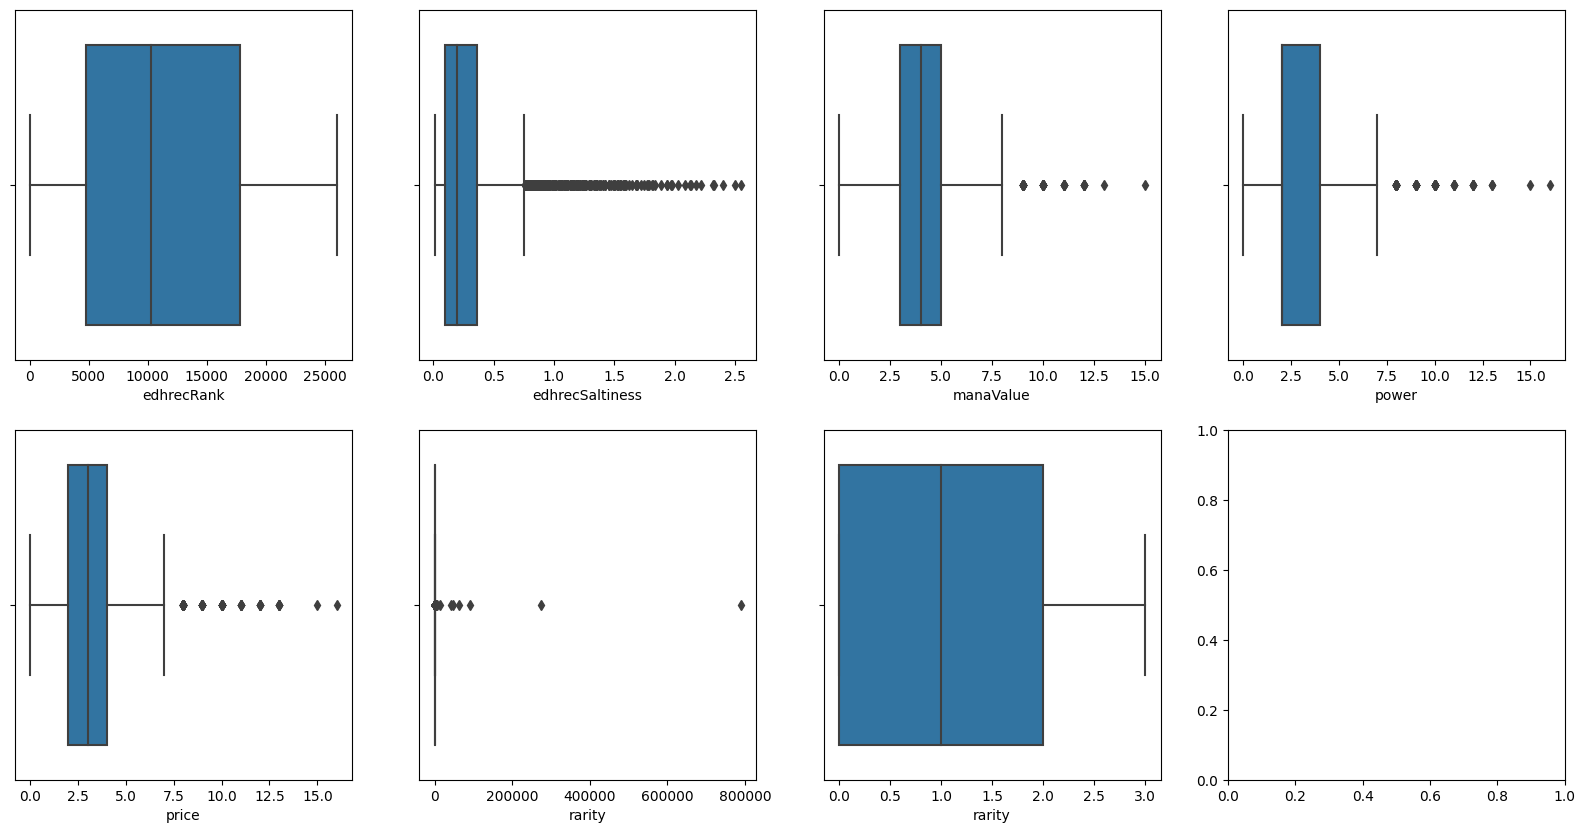

In [50]:
print("Variaveis com outliers: ")

dsc = df_desired[var_nums].describe() #obtendo estatísticas descritivas dos atributos numericos

for name in dsc.columns:
    q1 = dsc[name]["25%"]
    q3 = dsc[name]["75%"]
    iqr = q3-q1

    min_ = q1 - 1.5*iqr
    max_ = q3 + 1.5*iqr

    out_inf = np.where(dsc[name] < min_)[0]
    out_sup = np.where(dsc[name] > max_)[0]

    if ((out_inf.shape[0] > 0) or (out_sup.shape[0] > 0)):
        print(name)
    #
#

print("\n A observação também poderá ser feita de forma visual, mediante os gráficos de boxplot")


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 10))
sns.boxplot(ax = axs[0,0], data = df_desired, x = 'edhrecRank', orient = 'h');  axs[0, 0].set_xlabel('edhrecRank')
sns.boxplot(ax = axs[0,1], data = df_desired, x = 'edhrecSaltiness', orient = 'h'); axs[0, 1].set_xlabel("edhrecSaltiness")
sns.boxplot(ax = axs[0,2], data = df_desired, x =  'manaValue', orient = 'h', ); axs[1, 0].set_xlabel( "manaValue")
sns.boxplot(ax = axs[0,3], data = df_desired, x = 'power', orient = 'h'); axs[1, 1].set_xlabel("power")
sns.boxplot(ax = axs[1,0], data = df_desired, x =  'toughness', orient = 'h'); axs[1, 0].set_xlabel( "toughness")
sns.boxplot(ax = axs[1,1], data = df_desired, x = "price", orient = 'h'); axs[1, 0].set_xlabel("price")
sns.boxplot(ax = axs[1,2], data = df_desired, x = "rarity", orient = 'h'); axs[1, 1].set_xlabel("rarity")


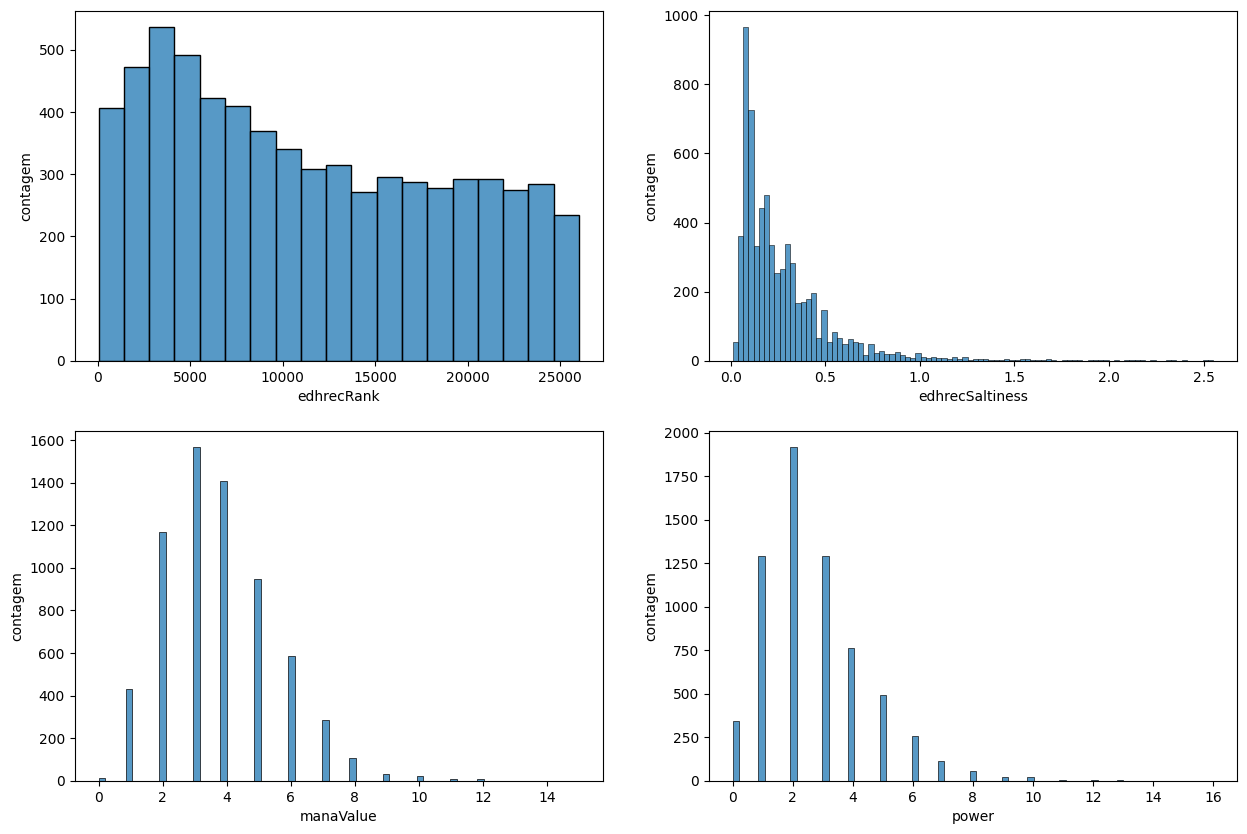

In [51]:
multigraficos_histograma(df_desired, 2, 2, var_nums)

In [52]:
df_desired.corr()

<ipython-input-52-41d04689d30e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_desired.corr()


,edhrecRank,edhrecSaltiness,manaValue,power,rarity,toughness,price
edhrecRank,1.000000,-0.269782,-0.032484,-0.065810,-0.471861,-0.102994,0.007733
edhrecSaltiness,-0.269782,1.000000,0.167935,0.152910,0.326370,0.164976,0.009330
manaValue,-0.032484,0.167935,1.000000,0.728702,0.316554,0.701142,-0.004216
power,-0.065810,0.152910,0.728702,1.000000,0.312276,0.739307,-0.009956
rarity,-0.471861,0.326370,0.316554,0.312276,1.000000,0.318471,0.002564
toughness,-0.102994,0.164976,0.701142,0.739307,0.318471,1.000000,-0.004607
price,0.007733,0.009330,-0.004216,-0.009956,0.002564,-0.004607,1.000000


In [53]:
df_desired.corr(method='pearson').style.background_gradient(cmap='coolwarm')

<ipython-input-53-363b214f8ac3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_desired.corr(method='pearson').style.background_gradient(cmap='coolwarm')


,edhrecRank,edhrecSaltiness,manaValue,power,rarity,toughness,price
edhrecRank,1.000000,-0.269782,-0.032484,-0.065810,-0.471861,-0.102994,0.007733
edhrecSaltiness,-0.269782,1.000000,0.167935,0.152910,0.326370,0.164976,0.009330
manaValue,-0.032484,0.167935,1.000000,0.728702,0.316554,0.701142,-0.004216
power,-0.065810,0.152910,0.728702,1.000000,0.312276,0.739307,-0.009956
rarity,-0.471861,0.326370,0.316554,0.312276,1.000000,0.318471,0.002564
toughness,-0.102994,0.164976,0.701142,0.739307,0.318471,1.000000,-0.004607
price,0.007733,0.009330,-0.004216,-0.009956,0.002564,-0.004607,1.000000


In [54]:
df_desired.corr(method='spearman').style.background_gradient(cmap='coolwarm')

<ipython-input-54-9b6c0370e216>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_desired.corr(method='spearman').style.background_gradient(cmap='coolwarm')


,edhrecRank,edhrecSaltiness,manaValue,power,rarity,toughness,price
edhrecRank,1.000000,-0.294339,-0.007562,-0.026420,-0.468108,-0.075263,-0.028901
edhrecSaltiness,-0.294339,1.000000,0.133704,0.096435,0.330092,0.120579,0.003820
manaValue,-0.007562,0.133704,1.000000,0.706216,0.312405,0.684596,-0.034312
power,-0.026420,0.096435,0.706216,1.000000,0.302194,0.656317,-0.018665
rarity,-0.468108,0.330092,0.312405,0.302194,1.000000,0.312513,0.018909
toughness,-0.075263,0.120579,0.684596,0.656317,0.312513,1.000000,-0.015538
price,-0.028901,0.003820,-0.034312,-0.018665,0.018909,-0.015538,1.000000


In [55]:
df_desired.corr(method='kendall').style.background_gradient(cmap='coolwarm')

<ipython-input-55-60f66f52e971>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_desired.corr(method='kendall').style.background_gradient(cmap='coolwarm')


,edhrecRank,edhrecSaltiness,manaValue,power,rarity,toughness,price
edhrecRank,1.000000,-0.201376,-0.005357,-0.019407,-0.357777,-0.054981,-0.019408
edhrecSaltiness,-0.201376,1.000000,0.097813,0.070672,0.256649,0.088302,0.002612
manaValue,-0.005357,0.097813,1.000000,0.604482,0.255607,0.583566,-0.024652
power,-0.019407,0.070672,0.604482,1.000000,0.249267,0.580510,-0.013540
rarity,-0.357777,0.256649,0.255607,0.249267,1.000000,0.258299,0.014423
toughness,-0.054981,0.088302,0.583566,0.580510,0.258299,1.000000,-0.011304
price,-0.019408,0.002612,-0.024652,-0.013540,0.014423,-0.011304,1.000000


In [56]:
df_desired.dropna(subset='price',inplace=True)

In [57]:
df_desired.isna().sum()

edhrecRank         0
edhrecSaltiness    0
manaValue          0
power              0
rarity             0
toughness          0
price              0
class              0
dtype: int64

In [58]:
df_desired['edhrecRank']

name
Ancestor's Chosen            20472.0
Angel of Mercy               16397.0
Angelic Wall                  6098.0
Aven Cloudchaser             16614.0
Benalish Knight              19196.0
                              ...   
Wilhelt, the Rotcleaver       1567.0
Eloise, Nephalia Sleuth       4722.0
Kyler, Sigardian Emissary     3034.0
Moorland Rescuer              6979.0
Sigarda's Vanguard            5735.0
Name: edhrecRank, Length: 6577, dtype: float64

In [59]:
k = np.where(df_desired["class"] == 'CartaBoa')[0]
df_desired["class"][k] = 1
del k

k = np.where(df_desired["class"] == 'CartaRuim')[0]
df_desired['class'][k] = -1
del k


<ipython-input-59-dfb9f1d4c747>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desired["class"][k] = 1
<ipython-input-59-dfb9f1d4c747>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desired['class'][k] = -1


In [60]:
classfinal = df_desired

# Código Classificação

Raiz quadrada deve ser melhor visto q queremos uma distribuição mais simetrica de cartas com alto ranking do edhrec e terá grande impacto no classificador.

Devemos usar a raiz cúbica para o indicador de edhrecSltiness a fim de conseguirmos uma distribuição mais simetrica


In [61]:
def balanceamento(n):
  cartaboa = df_desired[df_desired['class'] == 'CartaBoa'].iloc[:n]
  cartaruim = df_desired[df_desired['class'] == 'CartaRuim'].iloc[:n]
  classfinal = pd.concat([cartaboa, cartaruim])

In [62]:
classfinal['edhrecRank'].unique()

array([20472., 16397.,  6098., ...,  4722.,  3034.,  6979.])

# Linear Classifier


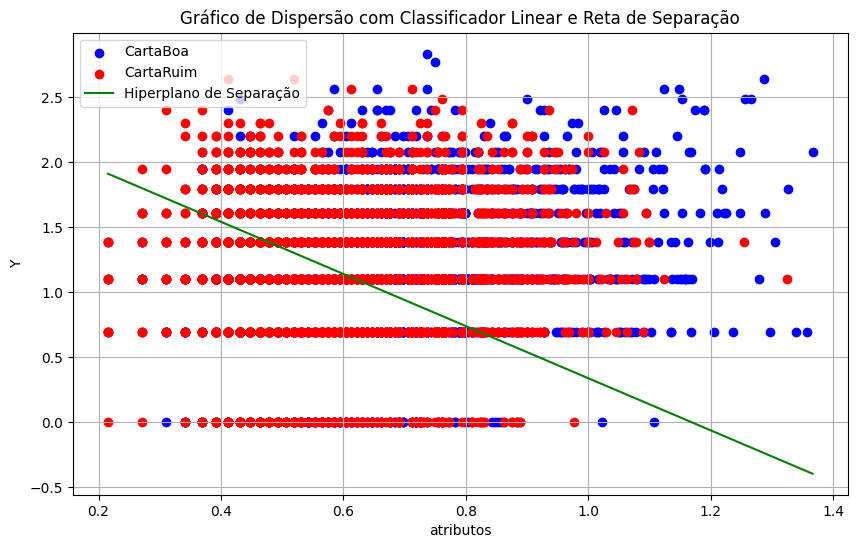

In [63]:
#Questão 3:
balanceamento(2000)

classfinal['edhrecSaltiness'] = np.cbrt(df_desired['edhrecSaltiness'])
classfinal['power'] = np.log1p(df_desired['power'])
classfinal['toughness'] = np.log1p(df_desired['toughness'])
classfinal['price'] = np.log1p(df_desired['price'])
classfinal['price'] = np.log1p(df_desired['rarity'])


X = classfinal[['edhrecSaltiness','power','toughness','price','rarity']].values
y = classfinal['class'].values

X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

w = np.dot(inv(np.dot(X.T, X)), np.dot(X.T, y))

w1, w2, w0 = w[0], w[4], w[5]

x_hyperplane = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
y_hyperplane = (-w0 - w1 * x_hyperplane) / w2

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='CartaBoa', c='blue')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='CartaRuim', c='red')
plt.plot(x_hyperplane, y_hyperplane, color='green', label='Hiperplano de Separação')
plt.xlabel('atributos')
plt.ylabel('Y')
plt.legend()
plt.title('Gráfico de Dispersão com Classificador Linear e Reta de Separação')
plt.grid(True)
plt.show()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(float), test_size=0.9, random_state=300
)

# **GaussianNB**

In [65]:
model = GaussianNB()

model.fit(X_train, y_train);

In [66]:
y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6984797297297297
F1 Score: 0.691581310341283


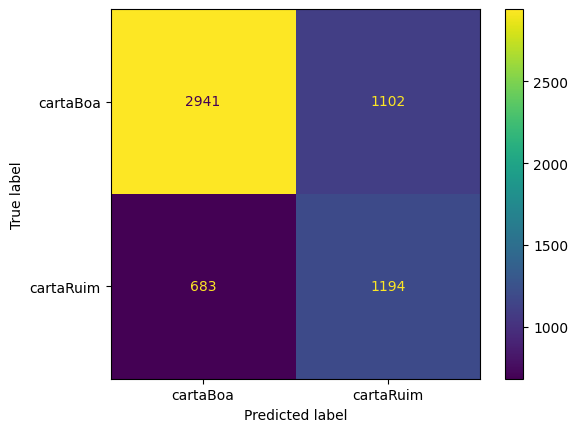

In [67]:
labels = ["cartaBoa", "cartaRuim"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# **Decision Tree**

In [68]:
df_desired['class'].value_counts()

-1    4490
 1    2087
Name: class, dtype: int64

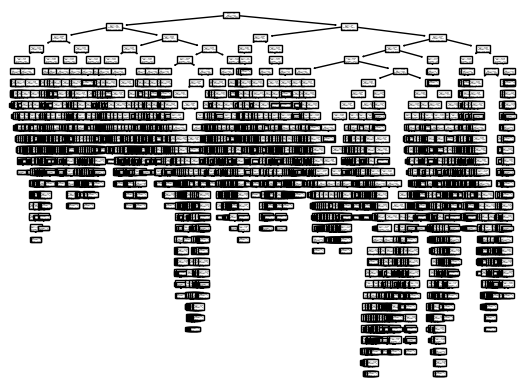

In [69]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y.astype(float))
tree.plot_tree(clf)
y_pred = clf.predict(X_test)

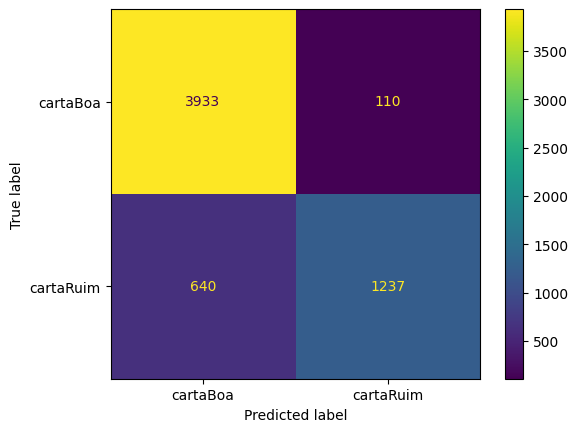

In [70]:
labels = ["cartaBoa", "cartaRuim"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# **KNeighors CLassifier**

In [71]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X, y.astype(float))
KNeighborsClassifier(...)
y_pred = neigh.predict(X_test)

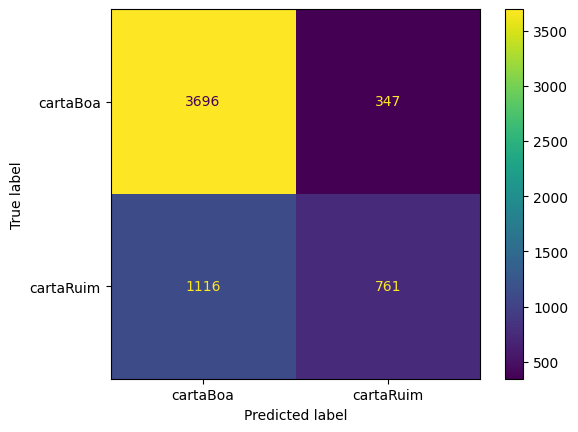

In [72]:
labels = ["cartaBoa", "cartaRuim"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# Regressão Linear


Coefficients: 
 [ 0.90217901 -0.195237   -0.00311395 -0.26000032  0.45003079  0.        ]
Mean squared error: 0.99
Coefficient of determination: -0.14


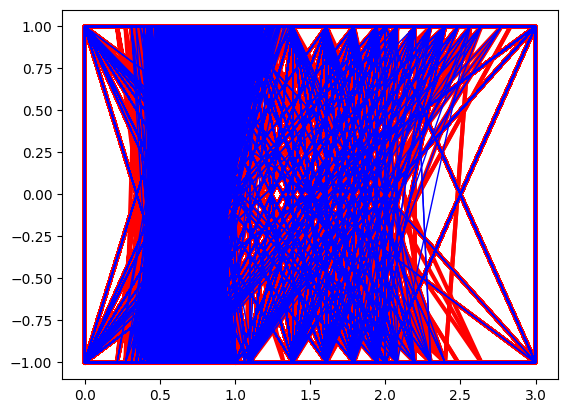

In [73]:
reg = LinearRegression().fit(X, y)
reg.predict(X)
print("Coefficients: \n", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
plt.plot(X_test, y_test, color="red",linewidth=3)
plt.plot(X_test, y_pred, color="blue", linewidth=1)
y_pred = reg.predict(X_test)
plt.show()

# **RandomForest**

Melhor modelo para a classificação

In [74]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.6785472972972973


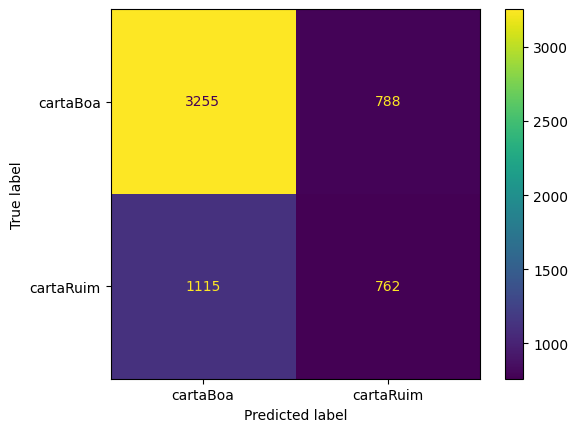

In [75]:
labels = ["cartaBoa", "cartaRuim"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [76]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending = True)
feature_imp

5    0.000000
3    0.076260
4    0.081104
2    0.138507
1    0.154218
0    0.549911
dtype: float64

Random Forest é o melhor classificador visto acuracia dele resultando em: 0.9989 ou seja 99,89% de acerto

# CurvaROC

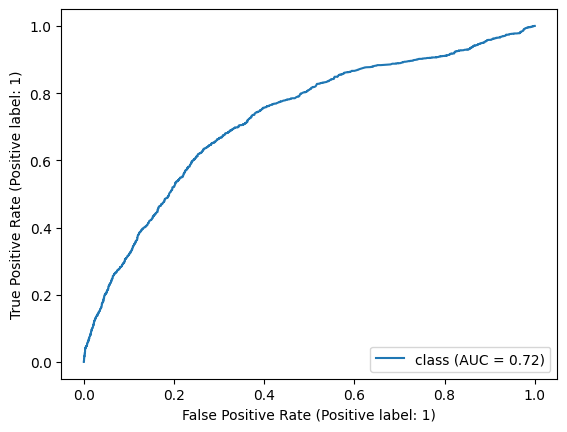

In [77]:
from sklearn.svm import SVC
from sklearn import metrics
clf = SVC(random_state=0).fit(X_train, y_train)
y_pred = clf.decision_function(X_test)
metrics.RocCurveDisplay.from_predictions(y_test, y_pred,name='class')
plt.show()

# Rede Neural MLP


In [78]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
score

0.7190878378378378

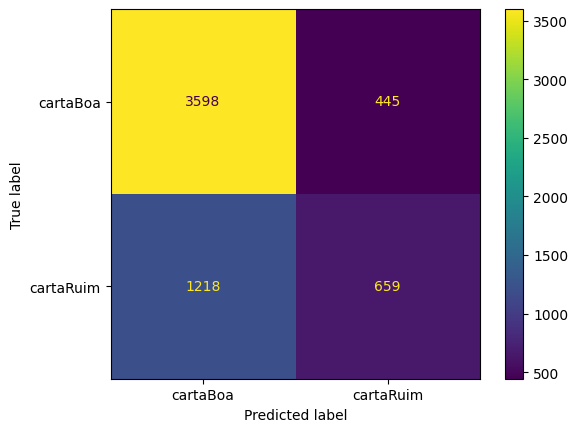

In [79]:
labels = ["cartaBoa", "cartaRuim"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [80]:
print(clf)

MLPClassifier(max_iter=300, random_state=1)


# Teste Predição Regressão Linear do Preço






In [81]:
df_desired['edhrecSaltiness'] = df_log1p
df_desired['power'] = df_desired['power'].apply(lambda x: np.log1p(x))
df_desired['price'] = df_desired['price'].apply(lambda x: np.log1p(x))
df_desired['toughness'] = df_desired['toughness'].apply(lambda x: np.log1p(x))
df_desired['rarity'] = df_desired['rarity'].apply(lambda x: np.log1p(x))
features = df_desired[['edhrecRank','power','toughness','edhrecSaltiness','manaValue']]

target = df_desired['price']
target

name
Ancestor's Chosen            0.526589
Angel of Mercy               0.526589
Angelic Wall                 0.000000
Aven Cloudchaser             0.000000
Benalish Knight              0.000000
                               ...   
Wilhelt, the Rotcleaver      0.869742
Eloise, Nephalia Sleuth      0.869742
Kyler, Sigardian Emissary    0.869742
Moorland Rescuer             0.741276
Sigarda's Vanguard           0.741276
Name: price, Length: 6577, dtype: float64

In [82]:
features.isna().sum()

edhrecRank         0
power              0
toughness          0
edhrecSaltiness    0
manaValue          0
dtype: int64

In [83]:
lm = LinearRegression()

lm.fit(features,target)

for feature, coeff in zip(features.columns,lm.coef_):
    print('feature: ', feature, ',', 'coeff: ', coeff)


feature:  edhrecRank , coeff:  -2.2283972228443348e-05
feature:  power , coeff:  0.044352597295160695
feature:  toughness , coeff:  0.06090379293797994
feature:  edhrecSaltiness , coeff:  0.02860695349179077
feature:  manaValue , coeff:  0.0437224680419481


In [84]:
model = sm.OLS(target.astype(float),features.astype(float)) # Same as sklearn linear regression

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                              4671.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):                        0.00
Time:                        00:35:32   Log-Likelihood:                         -770.08
No. Observations:                6577   AIC:                                      1550.
Df Residuals:                    6572   BIC:                                      1584.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
edhrecRank      -2.546e-05   5.65e-07    -45.066      0.000   -2.66e-05   -2.44e-05
power               0.0468      0.018      2.584      0.010       0.011       0.082
toughness           0.0696      0.021      3.253      0.001       0.028       0.112
edhrecSaltiness     0.0574      0.002     30.894      0.000       0.054       0.061
manaValue           0.0436      0.003     17.032      0.000       0.039       0.049
==============================================================================
Omnibus:                      388.661   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.822
Skew:                          -0.486   Prob(JB):                     2.66e-74
Kurtosis:                       2.461   Cond. No.                     9.68e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 1: Simple LR
# Model 2: LR with polynomial transformation
# Model 3: RidgeCV LR with feature scaling
# Model 4: RidgeCV LR with feature scaling polynomial transformation
# Model 5: LassoCV LR with feature scaling transformation
# Model 6: LassoCV LR with feature scaling and polynomial transformation

In [85]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=.40, random_state=None) # hold out 20% of the data for final testing

# X_train_val, X_test, y_train_val, y_test = train_test_split(features, log_target, test_size=.2, random_state=10) # for log transformed y

#this helps with the way kf will generate indices below
X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)
X_train_val.shape

(3946, 5)

In [86]:
kf = KFold(n_splits=60, shuffle=True, random_state = None)

# simple LR stats
lm_train_r2s = []
lm_val_r2s = []
lm_train_RMSEs = []
lm_val_RMSEs = []

# polynomial LR stats
poly_train_r2s = []
poly_val_r2s = []
poly_train_RMSEs = []
poly_val_RMSEs = []

# ridgeCV scaled LR stats
rid_scale_train_r2s = []
rid_scale_val_r2s = []
rid_scale_train_RMSEs = []
rid_scale_val_RMSEs = []

# ridgeCV scaled polynomial LR stats
rid_scale_poly_train_r2s = []
rid_scale_poly_val_r2s = []
rid_scale_poly_train_RMSEs = []
rid_scale_poly_val_RMSEs = []

# lassoCV scaled LR stats
las_scale_train_r2s = []
las_scale_val_r2s = []
las_scale_train_RMSEs = []
las_scale_val_RMSEs = []

# lassoCV scaled polynomial LR stats
las_scale_poly_train_r2s = []
las_scale_poly_val_r2s = []
las_scale_poly_train_RMSEs = []
las_scale_poly_val_RMSEs = []


#################################################################################################################
#################################################################################################################
#################################################################################################################

## LOOP

for train_ind, val_ind in kf.split(X_train_val,y_train_val):

    X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
    X_val, y_val = X_train_val[val_ind], y_train_val[val_ind]

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train) # fit_transform on train
    X_val_scaled = scaler.transform(X_val) # ONLY transform on val

    # Poly transforming
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    # Scaling then poly transforming
    X_train_scaled_poly = poly.fit_transform(X_train_scaled)
    X_val_scaled_poly = poly.transform(X_val_scaled)


#######################################################

    ### Model 1: Simple LR
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    lm_train_r2s.append(lm.score(X_train, y_train))
    lm_val_r2s.append(lm.score(X_val, y_val))
    lm_train_RMSEs.append(mean_squared_error(y_train, lm.predict(X_train),  squared=False))
    lm_val_RMSEs.append(mean_squared_error(y_val, lm.predict(X_val),  squared=False))

#######################################################

    ### Model 2: polynomial LR
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)

    poly_train_r2s.append(lm_poly.score(X_train_poly, y_train))
    poly_val_r2s.append(lm_poly.score(X_val_poly, y_val))
    poly_train_RMSEs.append(mean_squared_error(y_train, lm.predict(X_train),  squared=False))
    poly_val_RMSEs.append(mean_squared_error(y_val, lm.predict(X_val),  squared=False))

#######################################################

    ### Model 3: RidgeCV with feature scaling
    rid_scale = RidgeCV()
    rid_scale.fit(X_train_scaled, y_train)

    rid_scale_train_r2s.append(rid_scale.score(X_train_scaled, y_train))
    rid_scale_val_r2s.append(rid_scale.score(X_val_scaled, y_val))
    rid_scale_train_RMSEs.append(mean_squared_error(y_train, rid_scale.predict(X_train_scaled),  squared=False))
    rid_scale_val_RMSEs.append(mean_squared_error(y_val, rid_scale.predict(X_val_scaled),  squared=False))

#######################################################

    ### Model 4: RidgeCV with feature scaling and polynomial transformation

    rid_scale_poly = RidgeCV()
    rid_scale_poly.fit(X_train_scaled_poly, y_train)

    rid_scale_poly_train_r2s.append(rid_scale_poly.score(X_train_scaled_poly, y_train))
    rid_scale_poly_val_r2s.append(rid_scale_poly.score(X_val_scaled_poly, y_val))
    rid_scale_poly_train_RMSEs.append(mean_squared_error(y_train, rid_scale_poly.predict(X_train_scaled_poly),  squared=False))
    rid_scale_poly_val_RMSEs.append(mean_squared_error(y_val, rid_scale_poly.predict(X_val_scaled_poly),  squared=False))

#######################################################

    ### Model 5: LassoCV with feature scaling
    las_scale = LassoCV()
    las_scale.fit(X_train_scaled, y_train)

    las_scale_train_r2s.append(las_scale.score(X_train_scaled, y_train))
    las_scale_val_r2s.append(las_scale.score(X_val_scaled, y_val))
    las_scale_train_RMSEs.append(mean_squared_error(y_train, las_scale.predict(X_train_scaled),  squared=False))
    las_scale_val_RMSEs.append(mean_squared_error(y_val, las_scale.predict(X_val_scaled),  squared=False))

#######################################################

    ### Model 6: LassoCV with feature scaling and polynomial transformation

    las_scale_poly = LassoCV()
    las_scale_poly.fit(X_train_scaled_poly, y_train)

    las_scale_poly_train_r2s.append(las_scale_poly.score(X_train_scaled_poly, y_train))
    las_scale_poly_val_r2s.append(las_scale_poly.score(X_val_scaled_poly, y_val))
    las_scale_poly_train_RMSEs.append(mean_squared_error(y_train, las_scale_poly.predict(X_train_scaled_poly),  squared=False))
    las_scale_poly_val_RMSEs.append(mean_squared_error(y_val, las_scale_poly.predict(X_val_scaled_poly),  squared=False))

#######################################################


#################################################################################################################
#################################################################################################################
#################################################################################################################

# 1. Simple LR output
print('Simple LR')
# print('Train r2s: ', lm_train_r2s)
# print('Val r2s: ', lm_val_r2s)

print(f'Train mean r^2: {np.mean(lm_train_r2s):.3f} +- {np.std(lm_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(lm_val_r2s):.3f} +- {np.std(lm_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(lm_train_RMSEs):.3f} +- {np.std(lm_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(lm_val_RMSEs):.3f} +- {np.std(lm_val_RMSEs):.3f}')

print('\n')
#################################################################################################################
# 2. Simple LR with polynomial transformation output
print('Simple LR with polynomial transformation')

print(f'Train mean r^2: {np.mean(poly_train_r2s):.3f} +- {np.std(poly_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(poly_val_r2s):.3f} +- {np.std(poly_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(poly_train_RMSEs):.3f} +- {np.std(poly_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(poly_val_RMSEs):.3f} +- {np.std(poly_val_RMSEs):.3f}')

print('\n')
#################################################################################################################
# 3. RidgeCV with scaling transformation output
print('RidgeCV with scaling transformation')

print(f'Train mean r^2: {np.mean(rid_scale_train_r2s):.3f} +- {np.std(rid_scale_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(rid_scale_val_r2s):.3f} +- {np.std(rid_scale_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(rid_scale_train_RMSEs):.3f} +- {np.std(rid_scale_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(rid_scale_val_RMSEs):.3f} +- {np.std(rid_scale_val_RMSEs):.3f}')

print('\n')
#################################################################################################################
# 4. RidgeCV with scaling and polynomial transformation output
print('RidgeCV with scaling and polynomial transformation')

print(f'Train mean r^2: {np.mean(rid_scale_poly_train_r2s):.3f} +- {np.std(rid_scale_poly_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(rid_scale_poly_val_r2s):.3f} +- {np.std(rid_scale_poly_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(rid_scale_poly_train_RMSEs):.3f} +- {np.std(rid_scale_poly_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(rid_scale_poly_val_RMSEs):.3f} +- {np.std(rid_scale_poly_val_RMSEs):.3f}')

print('\n')
#################################################################################################################
# 5. LassoCV with scaling transformation output
print('LassoCV with scaling transformation')

print(f'Train mean r^2: {np.mean(las_scale_train_r2s):.3f} +- {np.std(las_scale_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(las_scale_val_r2s):.3f} +- {np.std(las_scale_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(las_scale_train_RMSEs):.3f} +- {np.std(las_scale_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(las_scale_val_RMSEs):.3f} +- {np.std(las_scale_val_RMSEs):.3f}')

print('\n')
#################################################################################################################
# 6. LassoCV with scaling and polynomial transformation output
print('LassoCV with scaling and polynomial transformation')

print(f'Train mean r^2: {np.mean(las_scale_poly_train_r2s):.3f} +- {np.std(las_scale_poly_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(las_scale_poly_val_r2s):.3f} +- {np.std(las_scale_poly_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(las_scale_poly_train_RMSEs):.3f} +- {np.std(las_scale_poly_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(las_scale_poly_val_RMSEs):.3f} +- {np.std(las_scale_poly_val_RMSEs):.3f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04049460452853282, tolerance: 0.03222802858229087
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13314725700919894, tolerance: 0.03222802858229087
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06113982427694964, tolerance: 0.03203747794340718
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Co

Simple LR
Train mean r^2: 0.289 +- 0.002
Val mean r^2: 0.274 +- 0.094
Train mean RMSE: 0.271 +- 0.000
val mean RMSE: 0.270 +- 0.020


Simple LR with polynomial transformation
Train mean r^2: 0.323 +- 0.002
Val mean r^2: 0.303 +- 0.100
Train mean RMSE: 0.271 +- 0.000
val mean RMSE: 0.270 +- 0.020


RidgeCV with scaling transformation
Train mean r^2: 0.289 +- 0.002
Val mean r^2: 0.274 +- 0.093
Train mean RMSE: 0.271 +- 0.000
val mean RMSE: 0.270 +- 0.020


RidgeCV with scaling and polynomial transformation
Train mean r^2: 0.322 +- 0.002
Val mean r^2: 0.302 +- 0.098
Train mean RMSE: 0.264 +- 0.000
val mean RMSE: 0.265 +- 0.021


LassoCV with scaling transformation
Train mean r^2: 0.289 +- 0.002
Val mean r^2: 0.274 +- 0.093
Train mean RMSE: 0.271 +- 0.000
val mean RMSE: 0.270 +- 0.020


LassoCV with scaling and polynomial transformation
Train mean r^2: 0.320 +- 0.002
Val mean r^2: 0.300 +- 0.097
Train mean RMSE: 0.265 +- 0.000
val mean RMSE: 0.265 +- 0.021


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.052199015473433974, tolerance: 0.03208997968885406
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1545911478248172, tolerance: 0.03208997968885406
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06712423832149739, tolerance: 0.031916814220142156
  model = cd_fast.enet_coordinate_descent_gram(


In [87]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_val) # fit_transform on original 80% of data
X_test_scaled = scaler.transform(X_test) # ONLY transform on val

# Polynomial transform
poly = PolynomialFeatures(degree=2)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

las_scale_poly_TEST = LassoCV()
las_scale_poly_TEST.fit(X_train_scaled_poly, y_train_val) # fitting model with transformed original train set

print(f'Lasso Scaled Polynomial Regression R^2 - Train set: {las_scale_poly_TEST.score(X_train_scaled_poly, y_train_val):.3f}')

print(f'Lasso Scaled Polynomial Regression R^2 - Test set: {las_scale_poly_TEST.score(X_test_scaled_poly, y_test):.3f}')

print(f'RMSE on test set: {mean_squared_error(y_test, las_scale_poly_TEST.predict(X_test_scaled_poly),  squared=False):.3f}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Lasso Scaled Polynomial Regression R^2 - Train set: 0.320
Lasso Scaled Polynomial Regression R^2 - Test set: 0.316
RMSE on test set: 0.268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11937041678183391, tolerance: 0.03268537940472054
  model = cd_fast.enet_coordinate_descent_gram(


In [88]:
new_coef = [(((np.e)**coef) - 1)*100 for coef in las_scale_poly_TEST.coef_]

new_coef[:10]

[0.0,
 -14.060535357611336,
 5.114083400202407,
 3.950625107145056,
 0.0,
 4.400711396864776,
 6.2169856585650995,
 -5.011057169097965,
 1.30040564552516,
 -7.358793569054511]

In [89]:
i=0
for name, coef in list(zip(poly.get_feature_names_out(features.columns), new_coef)):
# for name, coef in list(zip(poly.get_feature_names(features.columns), new_coef)): # for log transformed y model

    if abs(coef) > 1:
        print(name, coef)
        i+=1
print('\n')
print('total:',i)

edhrecRank -14.060535357611336
power 5.114083400202407
toughness 3.950625107145056
manaValue 4.400711396864776
edhrecRank^2 6.2169856585650995
edhrecRank power -5.011057169097965
edhrecRank toughness 1.30040564552516
edhrecRank edhrecSaltiness -7.358793569054511
edhrecRank manaValue 2.7037154315467715
power^2 2.131741941929266
power toughness 2.6415920887275846
power edhrecSaltiness 3.953783308823633
power manaValue -3.3264026215472087
toughness edhrecSaltiness -1.886219679112311
edhrecSaltiness^2 1.4020754266056645


total: 15


In [90]:
test_set_pred = las_scale_poly_TEST.predict(X_test_scaled_poly)

Text(0, 0.5, 'actual')

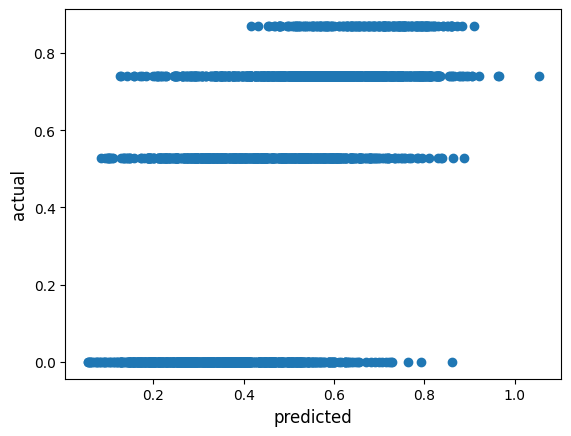

In [91]:
plt.scatter(test_set_pred, y_test)
plt.xlabel('predicted', size = 12)
plt.ylabel('actual', size = 12)

In [92]:
resid = test_set_pred-y_test.astype(float)
resid

name
Supply Caravan              0.354594
Armored Griffin             0.368091
Wetland Sambar              0.128057
Gluntch, the Bestower      -0.264056
Esquire of the King         0.169293
                              ...   
Village Elder               0.150290
Chainer, Dementia Master   -0.055647
Drogskol Reaver            -0.010350
Ranar the Ever-Watchful    -0.283310
Blood Operative            -0.402806
Name: price, Length: 2631, dtype: float64

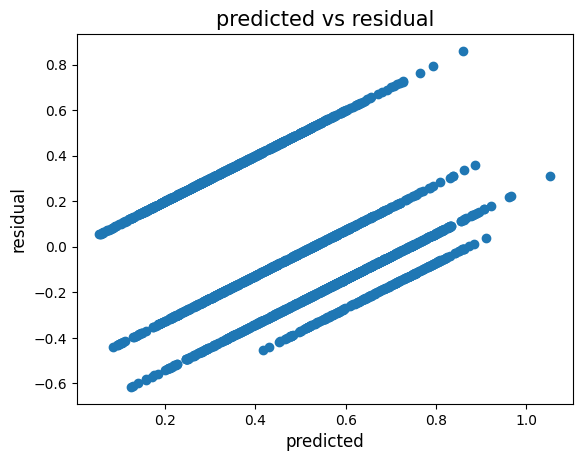

In [93]:
plt.scatter(test_set_pred, resid)
plt.xlabel('predicted', size=12)
plt.ylabel('residual', size = 12)
plt.title('predicted vs residual', size = 15);
# plt.title('predicted vs residual (log transformed target)', size = 15); # for log transfored

In [94]:
mean_squared_error(y_test, test_set_pred,  squared=True)

0.07162312092077638

In [95]:
mean_squared_error(y_test, test_set_pred,  squared=False)

0.26762496318687534

In [96]:
def mean_abs_err(y_true, y_pred):
    return np.mean(np.abs(y_pred.astype(float) - y_true.astype(float)))

mean_abs_err(y_test, test_set_pred)

0.22099720737757478

In [97]:
df_LLM = df_copy

In [98]:
desared_atributs = ['name', 'text', 'keywords','price']
df_LLM.drop(columns=[col for col in df if col not in desared_atributs], inplace=True)
df_LLM

,keywords,name,text
0,First strike,Ancestor's Chosen,First strike (This creature deals combat damag...
1,First strike,Ancestor's Chosen,First strike (This creature deals combat damag...
2,Flying,Angel of Mercy,Flying\nWhen Angel of Mercy enters the battlef...
3,Flying,Angel of Mercy,Flying\nWhen Angel of Mercy enters the battlef...
4,NaN,Angelic Blessing,Target creature gets +3/+3 and gains flying un...
...,...,...,...
87213,Kicker,Into the Roil,Kicker {1}{U} (You may pay an additional {1}{U...
87214,Kicker,Bloodchief's Thirst,Kicker {2}{B} (You may pay an additional {2}{B...
87215,Kicker,Roil Eruption,Kicker {5} (You may pay an additional {5} as y...
87216,NaN,Roiling Regrowth,Sacrifice a land. Search your library for up t...


In [99]:
price_column = df_price["price"]
df_LLM = pd.concat([df_LLM,price_column], axis = 1)

In [100]:
df_LLM

,keywords,name,text,price
0,First strike,Ancestor's Chosen,First strike (This creature deals combat damag...,0.08
1,First strike,Ancestor's Chosen,First strike (This creature deals combat damag...,0.27
2,Flying,Angel of Mercy,Flying\nWhen Angel of Mercy enters the battlef...,0.02
3,Flying,Angel of Mercy,Flying\nWhen Angel of Mercy enters the battlef...,0.17
4,NaN,Angelic Blessing,Target creature gets +3/+3 and gains flying un...,0.02
...,...,...,...,...
87213,Kicker,Into the Roil,Kicker {1}{U} (You may pay an additional {1}{U...,NaN
87214,Kicker,Bloodchief's Thirst,Kicker {2}{B} (You may pay an additional {2}{B...,NaN
87215,Kicker,Roil Eruption,Kicker {5} (You may pay an additional {5} as y...,NaN
87216,NaN,Roiling Regrowth,Sacrifice a land. Search your library for up t...,NaN


In [101]:
df_LLM.set_index(df_LLM['name'], inplace=True)

In [102]:
df_LLM

,keywords,name,text,price
name,,,,
Ancestor's Chosen,First strike,Ancestor's Chosen,First strike (This creature deals combat damag...,0.08
Ancestor's Chosen,First strike,Ancestor's Chosen,First strike (This creature deals combat damag...,0.27
Angel of Mercy,Flying,Angel of Mercy,Flying\nWhen Angel of Mercy enters the battlef...,0.02
Angel of Mercy,Flying,Angel of Mercy,Flying\nWhen Angel of Mercy enters the battlef...,0.17
Angelic Blessing,NaN,Angelic Blessing,Target creature gets +3/+3 and gains flying un...,0.02
...,...,...,...,...
Into the Roil,Kicker,Into the Roil,Kicker {1}{U} (You may pay an additional {1}{U...,NaN
Bloodchief's Thirst,Kicker,Bloodchief's Thirst,Kicker {2}{B} (You may pay an additional {2}{B...,NaN
Roil Eruption,Kicker,Roil Eruption,Kicker {5} (You may pay an additional {5} as y...,NaN


In [103]:
df_LLM.drop(columns='name')

,keywords,text,price
name,,,
Ancestor's Chosen,First strike,First strike (This creature deals combat damag...,0.08
Ancestor's Chosen,First strike,First strike (This creature deals combat damag...,0.27
Angel of Mercy,Flying,Flying\nWhen Angel of Mercy enters the battlef...,0.02
Angel of Mercy,Flying,Flying\nWhen Angel of Mercy enters the battlef...,0.17
Angelic Blessing,NaN,Target creature gets +3/+3 and gains flying un...,0.02
...,...,...,...
Into the Roil,Kicker,Kicker {1}{U} (You may pay an additional {1}{U...,NaN
Bloodchief's Thirst,Kicker,Kicker {2}{B} (You may pay an additional {2}{B...,NaN
Roil Eruption,Kicker,Kicker {5} (You may pay an additional {5} as y...,NaN


In [104]:
from transformers import AutoModelForSequenceClassification

model = (AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased')).to('cpu')

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error

def compute_metrics_for_regression(eval_pred):
    logits, labels = eval_pred
    labels = labels.reshape(-1, 1)

    print("Logits:", logits[0:5])
    print("Labels:", labels[0:5])

    mse = mean_squared_error(labels, logits)
    rmse = mean_squared_error(labels, logits, squared=False)
    mae = mean_absolute_error(labels, logits)
    single_squared_errors = ((logits - labels).flatten()**2).tolist()
    accuracy = sum([1 for e in single_squared_errors if e < 0.25]) / len(single_squared_errors)

    return {"mse": mse, "rmse": rmse, "mae": mae, "accuracy": accuracy}


In [106]:
! pip install -U accelerate
! pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.6 MB/s eta 0:00:00


In [107]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir='/content/drive/Shareddrives/Ufla/Pattern_Recognition/',
                                  num_train_epochs=5,
                                  weight_decay=0.01,
                                  learning_rate=0.1,
                                  evaluation_strategy='epoch',
                                  save_total_limit=35,
                                  logging_strategy='epoch',
                                  load_best_model_at_end=True,
                                  metric_for_best_model='accuracy',
                                  greater_is_better=False,
                                  save_strategy='epoch',
                                  push_to_hub=False
                                  )

trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=encoded_ds['train'],
                  eval_dataset=encoded_ds['eval'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics_for_regression)

ImportError: ignored

In [ ]:
pip install mlflow

In [ ]:
import mlflow

model = mlflow.transformers.load_model(model_uri=f"models:/{model_name}/{model_version}")

def predict_MLFlow_model(input: str) -> float :
    if not input or input.strip() == '' :
        return None
    return model(input)[0][0]

predict_MLFlow_model('I am a test Card')